In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Description 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Here we have several factors that affect the diabetes presence, and thease are:<br>
Pregnancies - Number of times pregnant. <br>
Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test.<br>
BloodPressue - Diastolic blood pressure (mm Hg).<br>
SkinTickness - Triceps skinfold thickness (mm)<br>
Insulin - 2-Hour serum insulin (mu U/ml).<br>
BMI - Body mass index (weight in kg/(height in m)^2).<br>
DiabetesPedigreeFunction - Diabetes pedigree function.<br>
Outcome - Class variable (0 or 1).<br>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Explanatory Data Anlysis 

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Histogram of the variable Pregnancies')

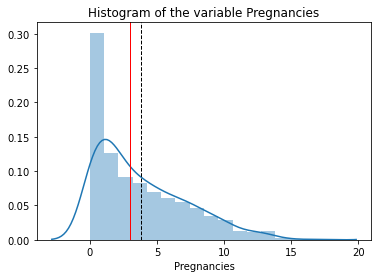

In [9]:
sns.distplot(data['Pregnancies'])
plt.axvline(data['Pregnancies'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['Pregnancies'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable Pregnancies')

Text(0.5, 1.0, 'Histogram of the variable Glucose')

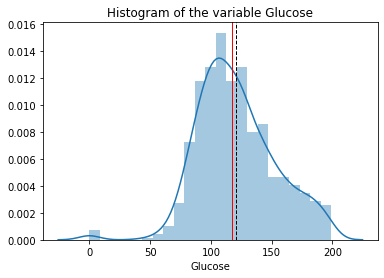

In [10]:
sns.distplot(data['Glucose'])
plt.axvline(data['Glucose'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['Glucose'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable Glucose')

Text(0.5, 1.0, 'Histogram of the variable BloodPressure')

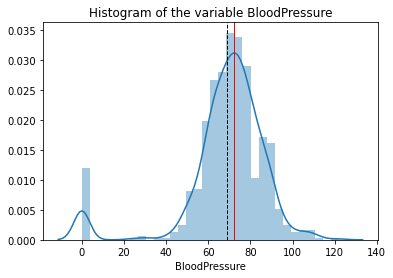

In [11]:
sns.distplot(data['BloodPressure'])
plt.axvline(data['BloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['BloodPressure'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable BloodPressure')

Text(0.5, 1.0, 'Histogram of the variable SkinThickness')

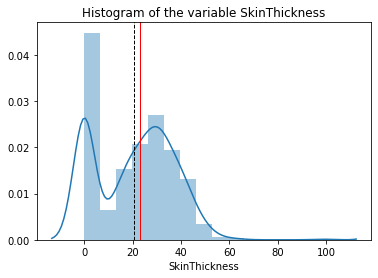

In [12]:
sns.distplot(data['SkinThickness'])
plt.axvline(data['SkinThickness'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['SkinThickness'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable SkinThickness')

Text(0.5, 1.0, 'Histogram of the variable Insulin')

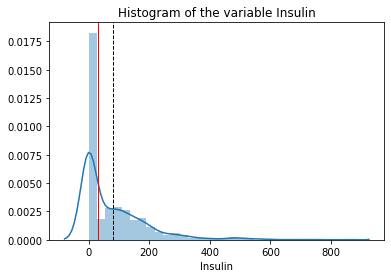

In [13]:
sns.distplot(data['Insulin'])
plt.axvline(data['Insulin'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['Insulin'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable Insulin')

Text(0.5, 1.0, 'Histogram of the variable BMI')

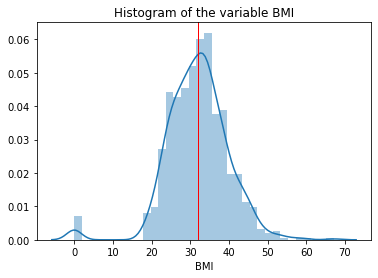

In [14]:
sns.distplot(data['BMI'])
plt.axvline(data['BMI'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['BMI'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable BMI')

We know that the normal BMI indes for adults lies between 18,5-24,9 range. As we see, from histogram our most pooular ranges lies between 30-40 , and from that we can conclude that in our data the most people has the between 25 and 29.9 –overweight range and between 30 and 39.9 – obese range.

Text(0.5, 1.0, 'Histogram of the variable Age')

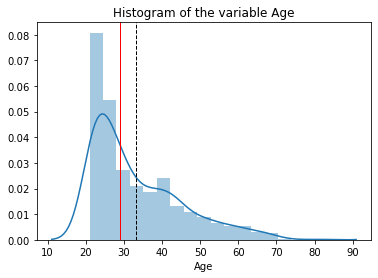

In [15]:
sns.distplot(data['Age'])
plt.axvline(data['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data['Age'].median(), color='r', linewidth=1)
plt.title('Histogram of the variable Age')

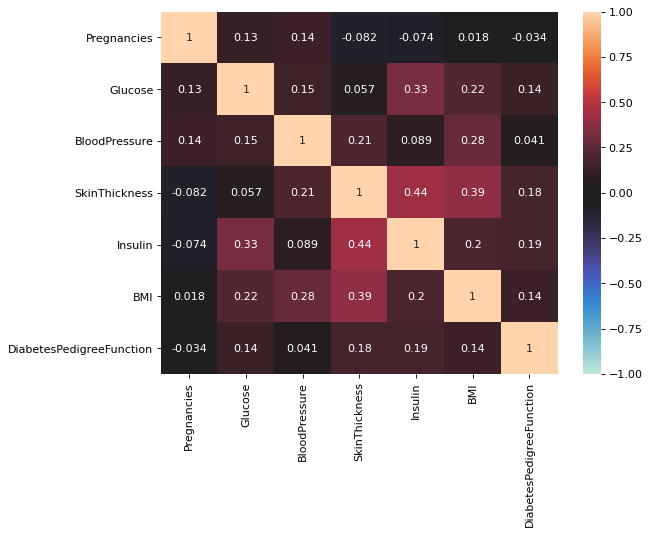

In [17]:
numeric = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
corr = data[numeric].corr()

plt.figure(num=None, figsize=(8, 6), dpi=80)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr)

#### Proportion of 0 and 1s in the data 

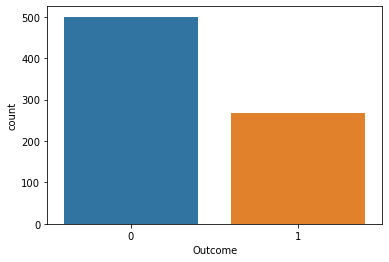

In [18]:
sns.countplot(data['Outcome'])

As we can see , here we have unbalanced data, for solving this problem we will try all our classification algorithms on unbalanced data, than on upsampled and downsaplmed data. 

### Data preprocessing and modeling

In [19]:
#Scaling our data, drop the label to scale numeric data

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [21]:
y = data.Outcome

In [22]:
#Split our dataset in train and test data with test size 1/3 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [23]:
#Constraining for loop to check the knn neighbours in the range 1-15, fin the best k 

from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(2,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [24]:
# This means that the train_score is the maximum when our k = 3
train_scores.index((max(train_scores)))

1

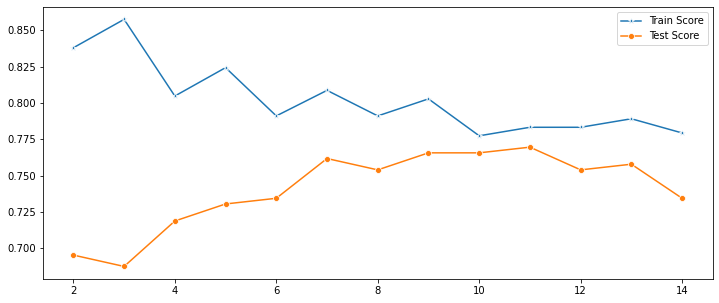

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(2,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(2,15),test_scores,marker='o',label='Test Score')

As we can see, our best train data score is at k = 3 , but when we look at dynamic graph with test score we see that scores are close to each other at k = 10. 

In [26]:
knn = KNeighborsClassifier(10)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [27]:
#Lets try our unbalanced data on logistic regression 
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test,y_test)
model_score

0.73828125

In [28]:
tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.6796875

In [29]:
from sklearn.model_selection import GridSearchCV


tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [30]:
from sklearn.model_selection import cross_val_score

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 76.57%


In [31]:
model2= tree_clf
model2.fit(X_train, y_train)
result = model2.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))


Accuracy: 72.266%


In [32]:
randForest = RandomForestClassifier()
randForest = randForest.fit(X_train, y_train) 
randForest.score(X_test,y_test)

0.76953125

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   44.6s finished


In [61]:
grid_accuracy = cross_val_score(best_grid, X_train, y_train)
print('Random Forest Classifier Cross Validation Score', round(grid_accuracy.mean() * 100, 2).astype(str) + '%')

Random Forest Classifier Cross Validation Score 77.54%


In [35]:
def results(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Recall_test', 'Precision_test','F1_score']
    
    results = pd.DataFrame(index=indx, columns=['Logistic', 'Knn', 'DC','RFC'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(X_train,y_train)
        test_y_new = cls.predict(X_test)    
        train_y_new = cls.predict(X_train)
        acc_train = accuracy_score(y_train,train_y_new)
        acc_test = accuracy_score(y_test,test_y_new)
        rec_test = recall_score(y_test,test_y_new)
        pr_test = precision_score(y_test,test_y_new)
        f1_test = f1_score(y_test,test_y_new)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, rec_test, pr_test,f1_test]
    return results  

In [36]:
model3 = best_grid

### Upsampling 

In [38]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking on the SkinThickness we see that the min and 25% quantiles are still 0 ,this means we have a lot 0-s in out data, but is is impossible to have 0 Thickness skin. The same we see fot the Insulin. To solve this problem first we replace our 0-s as Na's than we can fill them with appropriate value from our distribution. 

In [39]:
data_copy = data.copy(deep = True)

In [40]:
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [41]:
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Looking above, where we have ploted our histograms, we can fill this Na's with mean or median. 
Glucose we will fill with mean, because our median is very close to the mean,the same we will do for BloodPressure and SkinThickness. For insulin we will pick median, because median and mean are far from each other, in BMI , there is nor difference so we can pick median too. 


In [42]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(),inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(),inplace = True)

In [43]:
print(data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [44]:
#Now after filling our data we downsampling it, to try all this algorithms on our changed data 
data_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [45]:
sc_X = StandardScaler()
X_up =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [46]:
y_up = data_copy.Outcome

In [47]:
X_up_train,X_up_test,y_up_train,y_up_test = train_test_split(X_up,y_up,test_size=1/3,random_state=42, stratify=y_up)

In [48]:
train = pd.concat([X_up_train,y_up_train],  axis = 1)
majority = train[train.Outcome==0]
minority = train[train.Outcome==1]
majority.shape

(333, 9)

In [49]:
upsample = resample(minority, 
                       replace=True,    
                       n_samples=333,     
                       random_state=42) 
 

upsample = pd.concat([majority,upsample])
 
upsample['Outcome'].value_counts()

1    333
0    333
Name: Outcome, dtype: int64

In [50]:
y_up_train = upsample['Outcome'].astype(int)
X_up_train = upsample.drop(columns='Outcome',axis = 1)

print(f"Number of observations \n Train set: {len(X_up_train)}\n Test set: {len(X_up_test)}")

Number of observations 
 Train set: 666
 Test set: 256


In [51]:
test_scores_up = []
train_scores_up = []

for i in range(10,22):

    knn_up = KNeighborsClassifier(i)
    knn_up.fit(X_up_train,y_up_train)
    
    train_scores_up.append(knn_up.score(X_up_train,y_up_train))
    test_scores_up.append(knn_up.score(X_up_test,y_up_test))

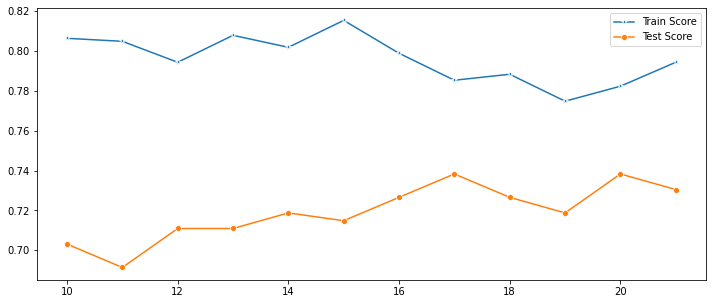

In [52]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(10,22),train_scores_up,marker='*',label='Train Score')
p = sns.lineplot(range(10,22),test_scores_up,marker='o',label='Test Score')

In [53]:
#The most close score comes for k = 12

knn_up= KNeighborsClassifier(17)

knn_up.fit(X_up_train,y_up_train)
knn_up.score(X_up_test,y_up_test)

0.73828125

In [54]:
model_up = LogisticRegression()
model_up.fit(X_up_train,y_up_train)
y_up_predict = model_up.predict(X_up_test)
model_up_score = model_up.score(X_up_test,y_up_test)
model_up_score

0.75

In [55]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_up_train, y_up_train)

# tree best estimator
tree_clf_up = grid_tree.best_estimator_

In [56]:
tree_score_up= cross_val_scoretree_clf_up, X_up_train, y_up_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score_up.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 72.52%


In [57]:
model2_up = tree_clf_up

In [59]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_up = GridSearchCV(rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_up.fit(X_up_train, y_up_train)
best_grid_up= grid_search_up.best_estimator_


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   43.1s finished


In [60]:
grid_accuracy_up = cross_val_score(best_grid_up, X_up_train, y_up_train)
print('Random Forest Classifier Cross Validation Score', round(grid_accuracy.mean() * 100, 2).astype(str) + '%')

Random Forest Classifier Cross Validation Score 76.93%


In [62]:
model3_up = best_grid_up

In [63]:
def results_up(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Recall_test', 'Precision_test','F1_score']
    
    results = pd.DataFrame(index=indx, columns=['Logistic', 'Knn', 'DC','RFC'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(X_up_train,y_up_train)
        test_y_new = cls.predict(X_up_test)    
        train_y_new = cls.predict(X_up_train)
        acc_train = accuracy_score(y_up_train,train_y_new)
        acc_test = accuracy_score(y_up_test,test_y_new)
        rec_test = recall_score(y_up_test,test_y_new)
        pr_test = precision_score(y_up_test,test_y_new)
        f1_test = f1_score(y_up_test,test_y_new)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, rec_test, pr_test,f1_test]
    return results  

In [64]:
classifiers_up = [knn_up,model_up, model2_up,model3_up]
res_up= results_up(classifiers_up)
classifiers = [knn,model, model2,model3]
res = results(classifiers)

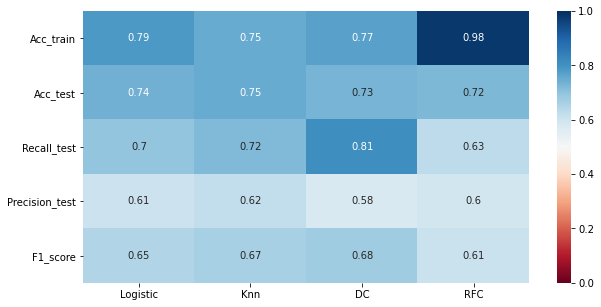

In [65]:
#for upsampled data 
plt.figure(figsize = (10, 5))
s = sns.heatmap(res_up,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

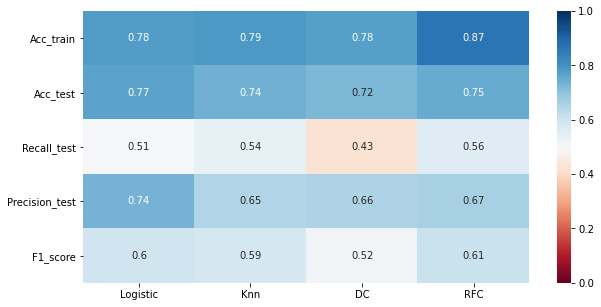

In [70]:
#for raw data 
plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

### Confusion Matrix 

###### Model:Knn For raw data and upsampled data 

In [72]:
y_pred_knn= knn_up.predict(X_up_test)

accuracy = metrics.accuracy_score(y_up_test, y_pred_knn)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_up_test,y_pred_knn)
print('Confusion Matrix: \n', cm)

Accuracy: 0.74
Confusion Matrix: 
 [[127  40]
 [ 27  62]]


In [73]:
y_pred_knn2= knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_knn2)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_test,y_pred_knn2)
print('Confusion Matrix: \n', cm)

Accuracy: 0.77
Confusion Matrix: 
 [[151  16]
 [ 44  45]]


###### Model:Logistic Regression for raw data and upsampled data 

In [74]:
y_pred_model= model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_model)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_test,y_pred_model)
print('Confusion Matrix: \n', cm)

Accuracy: 0.74
Confusion Matrix: 
 [[141  26]
 [ 41  48]]


In [75]:
y_pred_model_up= model_up.predict(X_up_test)

accuracy = metrics.accuracy_score(y_up_test, y_pred_model_up)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_up_test,y_pred_model_up)
print('Confusion Matrix: \n', cm)

Accuracy: 0.75
Confusion Matrix: 
 [[128  39]
 [ 25  64]]


###### Model: Decision tree for raw and upsampled data 

In [76]:
y_pred_model2= model2.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_model2)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_test,y_pred_model2)
print('Confusion Matrix: \n', cm)

Accuracy: 0.72
Confusion Matrix: 
 [[147  20]
 [ 51  38]]


In [79]:
y_pred_model2_up= model2_up.predict(X_up_test)

accuracy = metrics.accuracy_score(y_up_test, y_pred_model2_up)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_up_test,y_pred_model2_up)
print('Confusion Matrix: \n', cm)

Accuracy: 0.73
Confusion Matrix: 
 [[115  52]
 [ 17  72]]


###### Model:Random Forest for raw and upsampled data 

In [80]:
y_pred_model3= model3.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_model3)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_test,y_pred_model3)
print('Confusion Matrix: \n', cm)

Accuracy: 0.75
Confusion Matrix: 
 [[142  25]
 [ 39  50]]


In [81]:
y_pred_model3_up= model3_up.predict(X_up_test)

accuracy = metrics.accuracy_score(y_up_test, y_pred_model3_up)
print("Accuracy: {:.2f}".format(accuracy))

cm = confusion_matrix(y_up_test,y_pred_model3_up)
print('Confusion Matrix: \n', cm)

Accuracy: 0.72
Confusion Matrix: 
 [[129  38]
 [ 33  56]]
